In [23]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from scipy import signal
from scipy.signal import butter, filtfilt
import csv
def LecturaData(filename):
    data = pd.read_csv(filename, delimiter=',')
    for i in range(1,9):
        chanel = data.iloc[:,i].values
        if i==1:
            canales = chanel
        else:
            canales = np.vstack((canales,chanel))
    return canales

# Función para el Análisis en frecuencia

In [24]:

def Fourier(Data, nombre, limite = None):
    # Definir la frecuencia de muestreo y la cantidad de muestras
    fs = 250 # Frecuencia de muestreo de la señal (en Hz)
    n_samples = len(Data)

    # Calcular la transformada de Fourier para cada variable
    freqs = np.fft.rfftfreq(n_samples, 1/fs)
    fft_Data = np.abs(np.fft.rfft(Data))
    fft_data_db = 20 * np.log10(fft_Data)
    plt.figure(figsize=(5,3))
    plt.plot(freqs, fft_data_db)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    if limite is not None:
        plt.xlim(limite)
    plt.title(nombre)
    plt.grid()
    plt.show()


# Función Potencia de la señal

In [25]:
def potencia(data):
    #Potencia de la señal es elevar al cuadrado y dividir entre el tiempo
    pot = data*data
    pot_sum = np.sum(pot)

    return pot_sum*250/len(data)

# Función para la Normalización de la señal

In [26]:
def Normalizacion(data_filtrada):
    mean = np.mean(data_filtrada)
    std = np.std(data_filtrada)
    min = np.min(data_filtrada)
    max = np.max(data_filtrada)

    #Normalización por amplitud máxima
    norm_max = (data_filtrada - min) / (max - min)
    #Normalización por desviación estándar
    norm_std = (data_filtrada - mean) / std
    return (norm_max,norm_std)


# Función para Graficar las señales

In [27]:
def graficar(data, nombre, limite = None, correccion = True):
    if correccion is True:
        plt.figure(figsize=(10,5))
        t = np.arange(0.0, 0.0 + len(data)/250, 0.004)
        plt.plot(t,data)
        plt.title(nombre)
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Magnitud (uV)')
        if limite is not None:
            plt.xlim(limite)
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        plt.plot(data)
        plt.title(nombre)
        plt.xlabel('Samples (n)')
        plt.ylabel('Magnitud')
        if limite is not None:
            plt.xlim(limite)
        plt.show()
def graficar_cuadratica(data, nombre, limite = None, correccion = True):
    if correccion is True:
        plt.figure(figsize=(10,5))
        t = np.arange(0.0, 0.0 + len(data)/250, 0.004)
        plt.plot(t,data*data)
        plt.title(nombre)
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Magnitud ((uV)^2)')
        if limite is not None:
            plt.xlim(limite)
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        plt.plot(data)
        plt.title(nombre)
        plt.xlabel('Samples (n)')
        plt.ylabel('Magnitud')
        if limite is not None:
            plt.xlim(limite)
        plt.show()

# Función para el Filtrado

In [28]:

def filtrar_eeg(data, nombre_grafica = None):
    fs = 250 # Frecuencia de muestreo de la señal (en Hz)
    lowcut = 5 # Frecuencia de corte inferior (en Hz)
    highcut = 50 # Frecuencia de corte superior (en Hz)

    # Calcular las frecuencias normalizadas de corte
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    # Calcular los coeficientes del filtro Butterworth
    order = 4 # Orden del filtro
    b, a = butter(order, [low, high], btype='band')

    beta = filtfilt(b,a,data,axis=0)
    if nombre_grafica is not None:
        graficar(beta,nombre_grafica)
    return beta

# Función para la Extracción onda beta y alfa

In [29]:

def Beta(data, nombre_grafica = None):
    fs = 250 # Frecuencia de muestreo de la señal (en Hz)
    lowcut = 11.5 # Frecuencia de corte inferior (en Hz)
    highcut = 30.5 # Frecuencia de corte superior (en Hz)

    # Calcular las frecuencias normalizadas de corte
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    # Calcular los coeficientes del filtro Butterworth
    order = 8 # Orden del filtro
    b, a = butter(order, [low, high], btype='band')

    beta = filtfilt(b,a,data,axis=0)
    if nombre_grafica is not None:
        graficar(beta,nombre_grafica)
    return beta
def Alfa(data, nombre_grafica = None):
    fs = 250 # Frecuencia de muestreo de la señal (en Hz)
    lowcut = 7.5 # Frecuencia de corte inferior (en Hz)
    highcut = 12.5 # Frecuencia de corte superior (en Hz)

    # Calcular las frecuencias normalizadas de corte
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    # Calcular los coeficientes del filtro Butterworth
    order = 8 # Orden del filtro
    b, a = butter(order, [low, high], btype='band')

    beta = filtfilt(b,a,data,axis=0)
    if nombre_grafica is not None:
        graficar(beta,nombre_grafica)
    return beta

# Función para hallar el Power Spectral Density

In [30]:
def psd(senal, alfa = None, beta = None, graficar=None):
    f, power = signal.welch(senal,250)
    power_total = np.trapz(power,f)

    f_min = 8  # Frecuencia mínima
    f_max = 12  # Frecuencia máxima
    indices = np.where((f >= f_min) & (f <= f_max))
    frequencies_filtered_a = f[indices]
    psd_filtered_a = power[indices]
        
    power_alfa = np.trapz(psd_filtered_a, frequencies_filtered_a)

    f_min = 12  # Frecuencia mínima
    f_max = 30  # Frecuencia máxima
    indices = np.where((f >= f_min) & (f <= f_max))
    frequencies_filtered = f[indices]
    psd_filtered = power[indices]
            
    power_beta = np.trapz(psd_filtered, frequencies_filtered)
    if graficar is not None:
        plt.semilogy(f, power)
        plt.show()
    if alfa is not None:
        if beta is not None:
            return (power_alfa,power_beta)
        else:
            return power_alfa
    else:
        if beta is not None:
            return power_beta
        else:
            return power_total

# Función para hallar el Espectrograma con Wavelet de morlet

In [31]:

def spectogram_morlet(senal,titulo,ax): 
    t,dt = np.linspace(0,len(senal)/250, len(senal), retstep=True)
    
    fs = 250
    w = 20.0
    # sig = np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
    freq = np.linspace(1, 80, 100)
    widths = w*fs / (2*freq*np.pi)
    cwtm = signal.cwt(senal, signal.morlet2, widths, w=w)
    ax.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
    # ax.title(titulo)
    # ax.xlabel('Tiempo (s)')
    # ax.colorbar(label='Amplitud (uV)')
    # ax.ylabel('Frecuencia (Hz)')
    ax.set_title(titulo)
    ax.set_xlabel('Tiempo (s)')
    ax.figure.colorbar(ax.collections[0], ax=ax, label='Amplitud (uV)')
    ax.set_ylabel('Frecuencia (Hz)')
    # ax.show()

# Lectura de la Data

In [32]:
for i in range(1,16):
    if i == 1:
        raw_adelante = []
        raw_atras = []
        raw_nada = []
    filename1 = "arriba_"+str(i)+".txt"
    filename2 = "abajo_"+str(i)+".txt"
    filename3 = "nada_"+str(i)+".txt"
    
    adelante = LecturaData(filename1)
    atras = LecturaData(filename2)
    nada = LecturaData(filename3)
    
    raw_adelante.append(adelante)
    raw_atras.append(atras)
    raw_nada.append(nada)
        

# Las 15 tomas de dato para los canales 3 y 4

In [33]:

escala_mV = 0.02235
canal3_filtrado_adelante = []
canal3_filtrado_atras = []
canal3_filtrado_nada = []

canal3_beta_adelante = []
canal3_beta_atras = []
canal3_beta_nada = []

canal3_alfa_adelante = []
canal3_alfa_atras = []
canal3_alfa_nada = []


canal4_filtrado_adelante = []
canal4_filtrado_atras = []
canal4_filtrado_nada = []

canal4_beta_adelante = []
canal4_beta_atras = []
canal4_beta_nada = []

canal4_alfa_adelante = []
canal4_alfa_atras = []
canal4_alfa_nada = []

for j in range(2):

    for i in range(15):
        senal_adelante = raw_adelante[i][j]
        senal_atras = raw_atras[i][j]
        senal_nada = raw_nada[i][j]

        senal_adelante = senal_adelante*escala_mV
        senal_atras = senal_atras*escala_mV
        senal_nada = senal_nada*escala_mV
        
        filtered_adelante = filtrar_eeg(senal_adelante)
        filtered_atras = filtrar_eeg(senal_atras)
        filtered_nada = filtrar_eeg(senal_nada)

        alfa_adelante = Alfa(filtered_adelante)
        alfa_atras = Alfa(filtered_atras)
        alfa_nada = Alfa(filtered_nada)

        beta_adelante = Beta(filtered_adelante)
        beta_atras = Beta(filtered_atras)
        beta_nada = Beta(filtered_nada)

        
        
        if j ==0:
            #Canal 3
            canal3_filtrado_adelante.append(filtered_adelante)
            canal3_filtrado_atras.append(filtered_atras)
            canal3_filtrado_nada.append(filtered_nada)

            canal3_beta_adelante.append(beta_adelante)
            canal3_beta_atras.append(beta_atras)
            canal3_beta_nada.append(beta_nada)

            canal3_alfa_adelante.append(alfa_adelante)
            canal3_alfa_atras.append(alfa_atras)
            canal3_alfa_nada.append(alfa_nada)
        else:
            #Canal 4
            canal4_filtrado_adelante.append(filtered_adelante)
            canal4_filtrado_atras.append(filtered_atras)
            canal4_filtrado_nada.append(filtered_nada)

            canal4_beta_adelante.append(beta_adelante)
            canal4_beta_atras.append(beta_atras)
            canal4_beta_nada.append(beta_nada)

            canal4_alfa_adelante.append(alfa_adelante)
            canal4_alfa_atras.append(alfa_atras)
            canal4_alfa_nada.append(alfa_nada)

#Adelante = 0
#Atras = 1
#Nada = 2
canal3_filtrado = []
canal3_filtrado.append(canal3_filtrado_adelante)
canal3_filtrado.append(canal3_filtrado_atras)
canal3_filtrado.append(canal3_filtrado_nada)

canal3_alfa = []
canal3_alfa.append(canal3_alfa_adelante)
canal3_alfa.append(canal3_alfa_atras)
canal3_alfa.append(canal3_alfa_nada)

canal3_beta = []
canal3_beta.append(canal3_beta_adelante)
canal3_beta.append(canal3_beta_atras)
canal3_beta.append(canal3_beta_nada)


canal4_filtrado = []
canal4_filtrado.append(canal4_filtrado_adelante)
canal4_filtrado.append(canal4_filtrado_atras)
canal4_filtrado.append(canal4_filtrado_nada)

canal4_alfa = []
canal4_alfa.append(canal4_alfa_adelante)
canal4_alfa.append(canal4_alfa_atras)
canal4_alfa.append(canal4_alfa_nada)

canal4_beta = []
canal4_beta.append(canal4_beta_adelante)
canal4_beta.append(canal4_beta_atras)
canal4_beta.append(canal4_beta_nada)
        

# Análisis EEG

## Gráfica data sin procesar

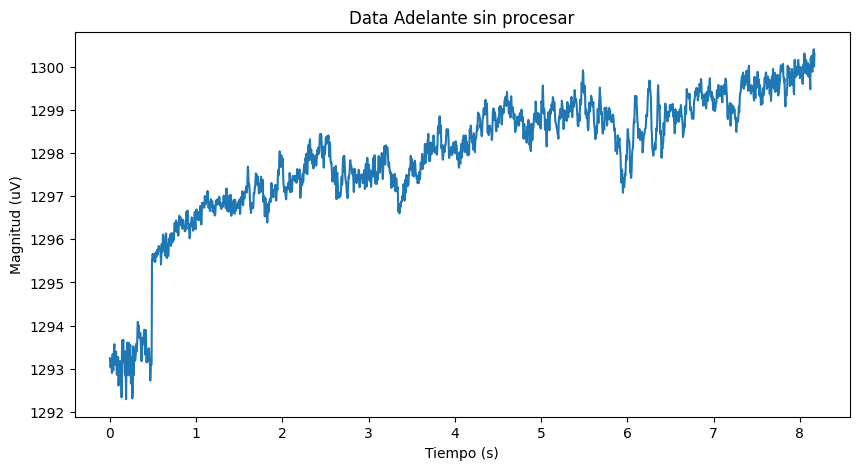

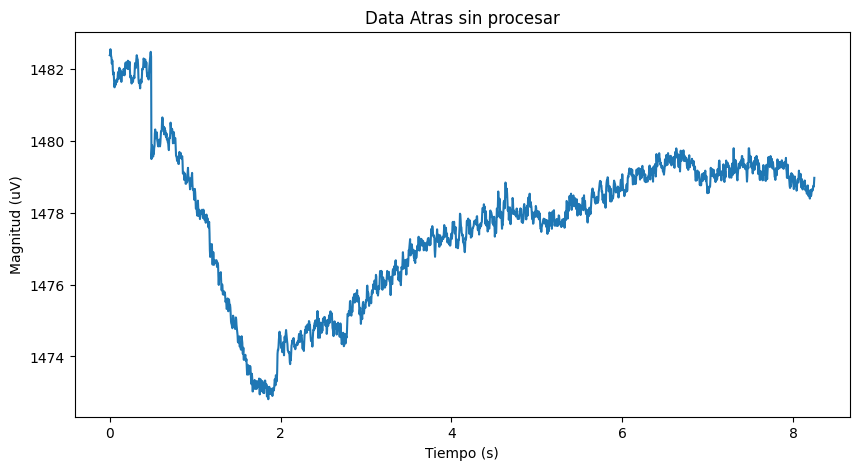

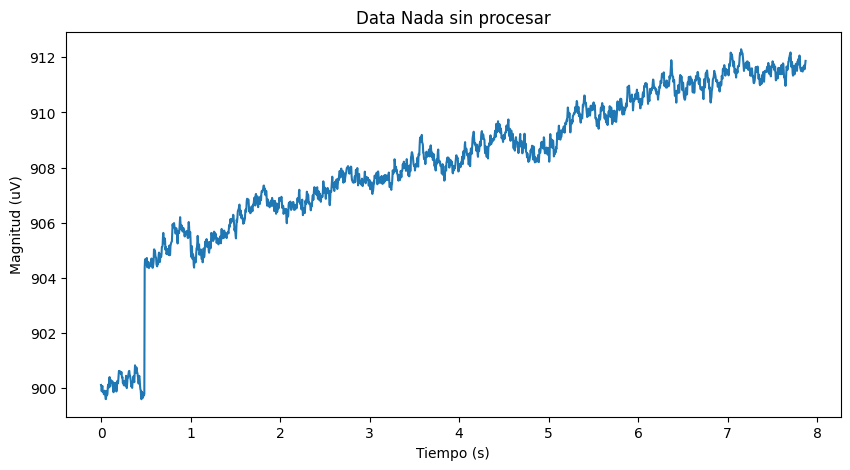

In [34]:
toma1 = random.randint(0,14)
toma2 = random.randint(0,14)
toma3 = random.randint(0,14)

graficar(raw_adelante[toma1][0]*escala_mV,nombre="Data Adelante sin procesar",correccion=True)
graficar(raw_atras[toma2][0]*escala_mV,nombre="Data Atras sin procesar",correccion=True)
graficar(raw_nada[toma3][0]*escala_mV,nombre="Data Nada sin procesar",correccion=True)

## Data filtrada en uV y segundos (s)

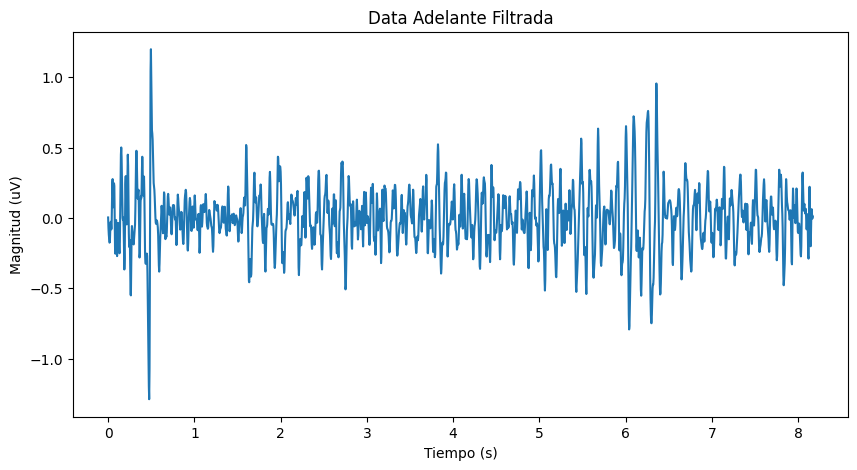

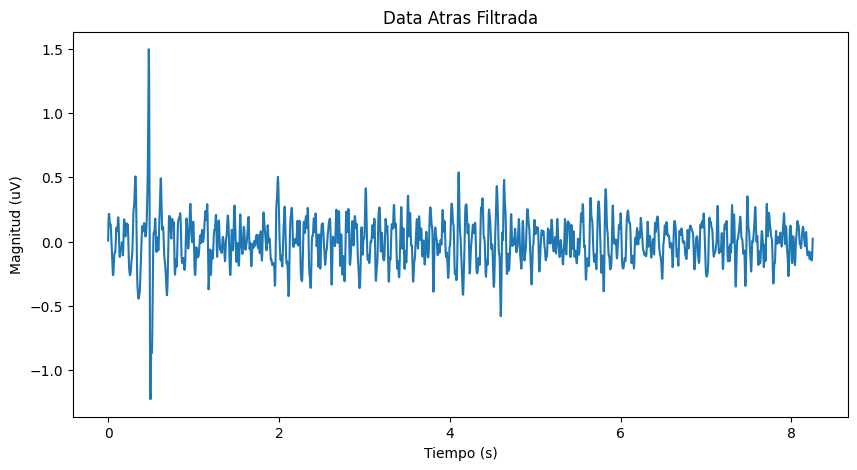

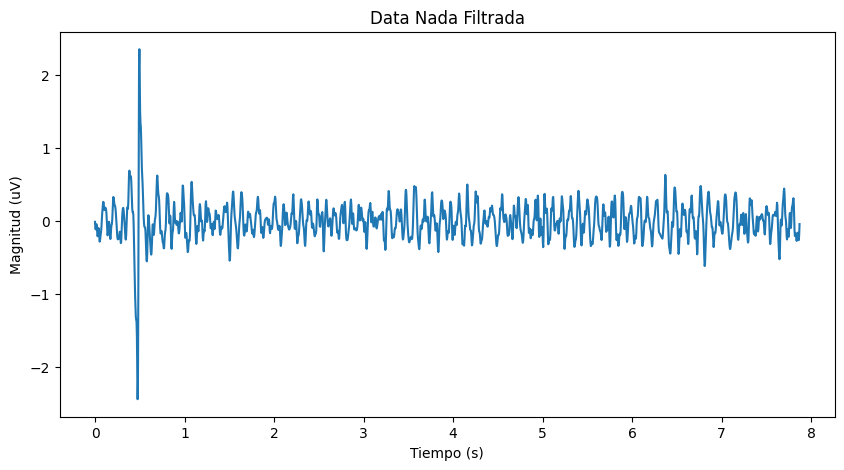

In [35]:
graficar(canal3_filtrado[0][toma1],nombre="Data Adelante Filtrada")
graficar(canal3_filtrado[1][toma2],nombre="Data Atras Filtrada")
graficar(canal3_filtrado[2][toma3],nombre="Data Nada Filtrada")

## Transformada de Fourier para la data filtrada

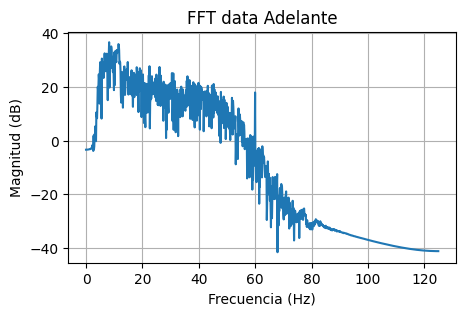

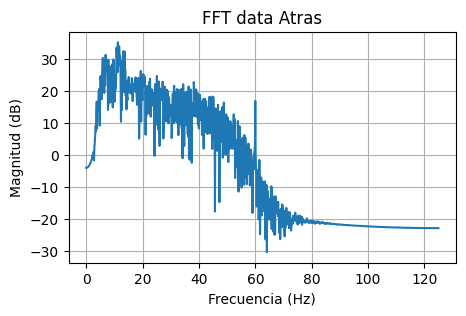

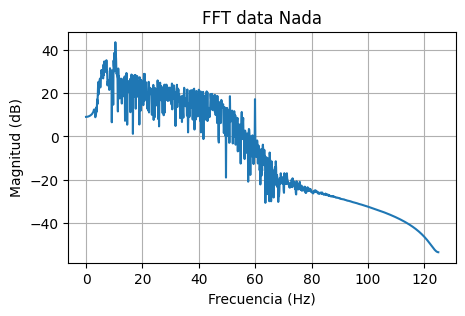

In [36]:
Fourier(canal3_filtrado[0][toma1],nombre="FFT data Adelante")
Fourier(canal3_filtrado[1][toma2],nombre="FFT data Atras")
Fourier(canal3_filtrado[2][toma3],nombre="FFT data Nada")

## Obtención ondas alfa

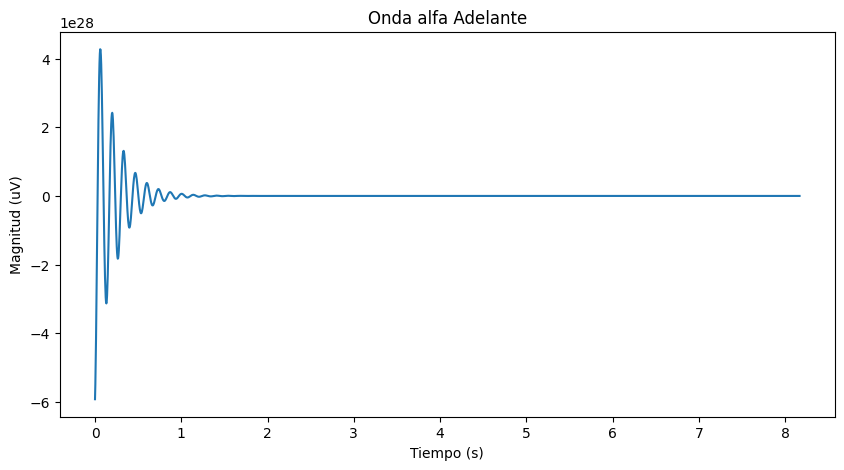

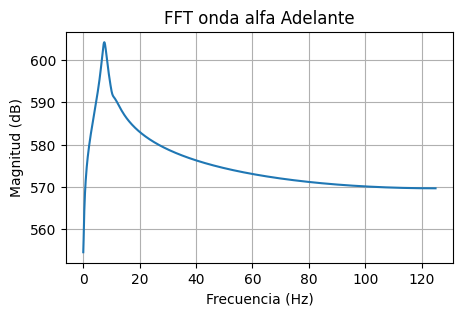

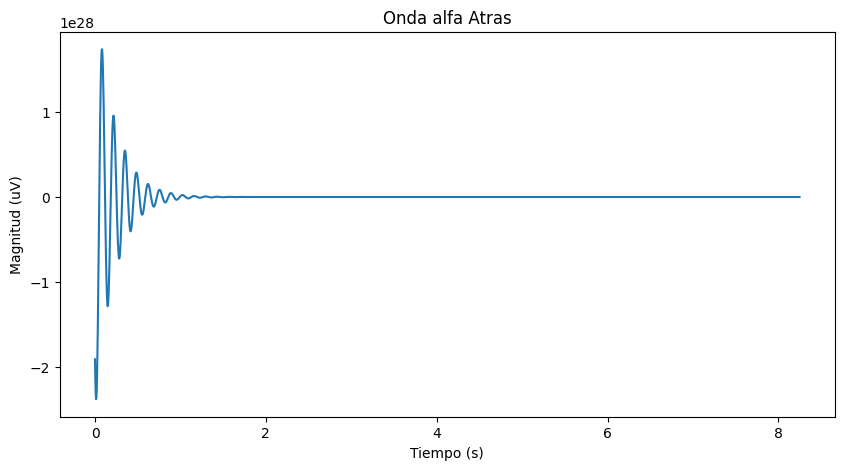

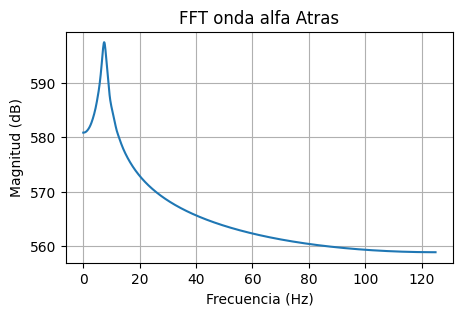

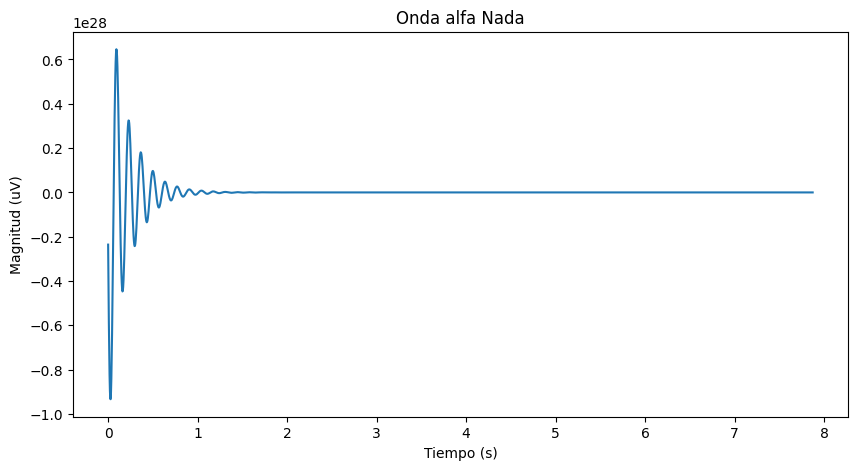

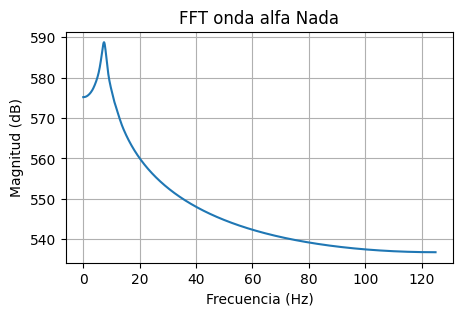

In [37]:
graficar(canal3_alfa[0][toma1],nombre="Onda alfa Adelante")
Fourier(canal3_alfa[0][toma1],nombre="FFT onda alfa Adelante")
graficar(canal3_alfa[1][toma2],nombre="Onda alfa Atras")
Fourier(canal3_alfa[1][toma2],nombre="FFT onda alfa Atras")
graficar(canal3_alfa[2][toma3],nombre="Onda alfa Nada")
Fourier(canal3_alfa[2][toma3],nombre="FFT onda alfa Nada")

## Obtención ondas beta

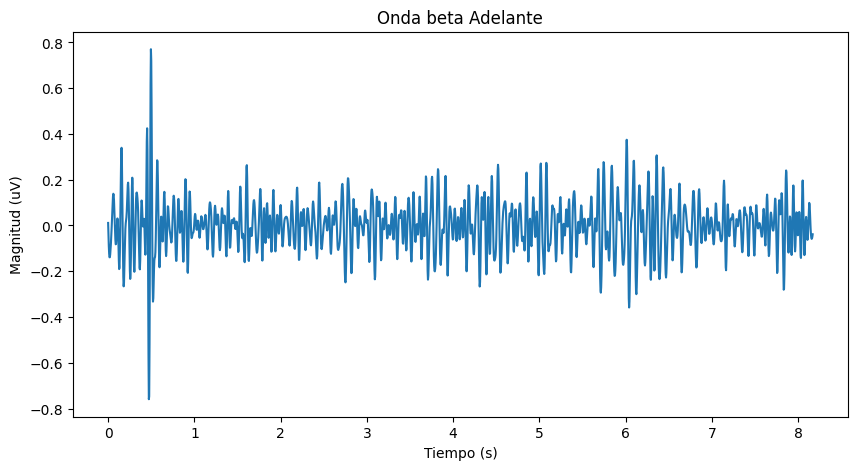

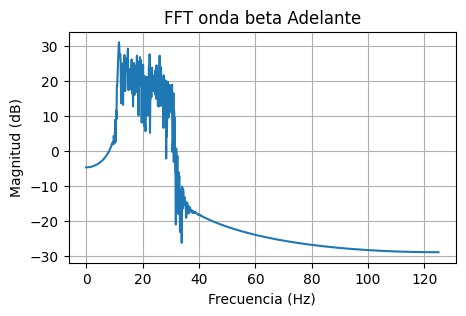

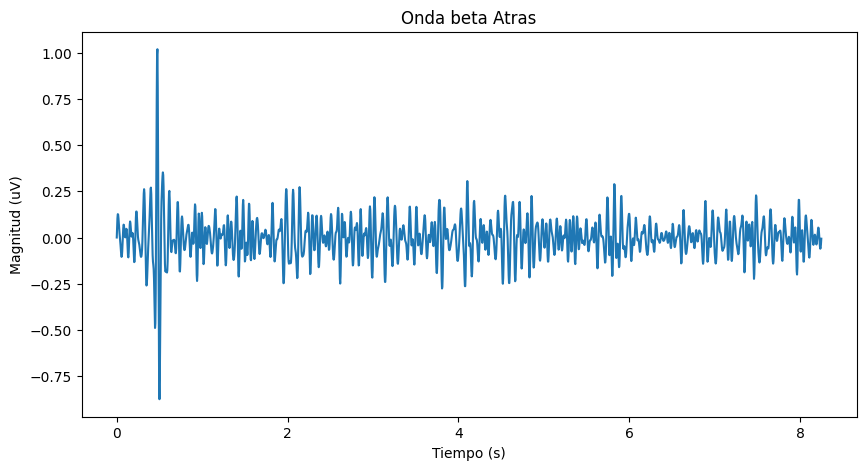

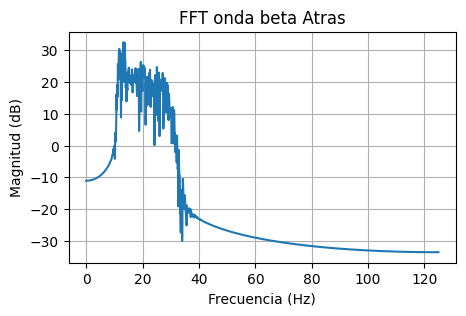

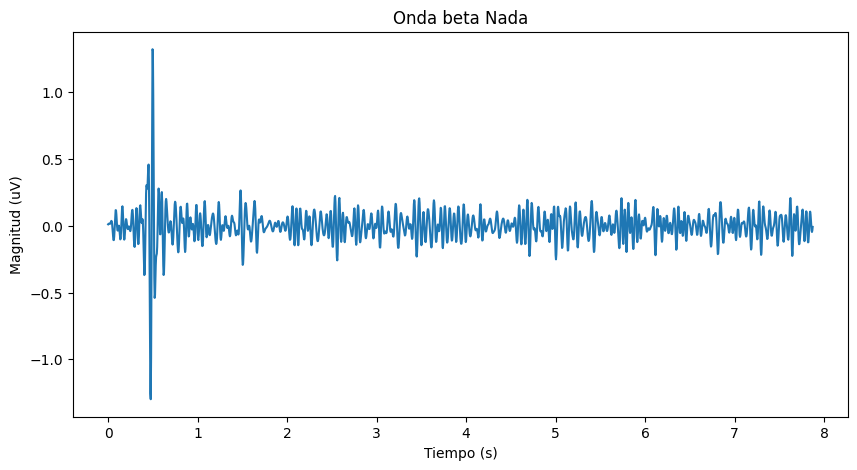

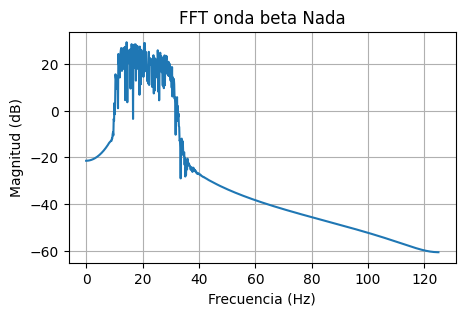

In [38]:
graficar(canal3_beta[0][toma1],nombre="Onda beta Adelante")
Fourier(canal3_beta[0][toma1],nombre="FFT onda beta Adelante")
graficar(canal3_beta[1][toma2],nombre="Onda beta Atras")
Fourier(canal3_beta[1][toma2],nombre="FFT onda beta Atras")
graficar(canal3_beta[2][toma3],nombre="Onda beta Nada")
Fourier(canal3_beta[2][toma3],nombre="FFT onda beta Nada")

## Potencia de las señales

### Potencia total

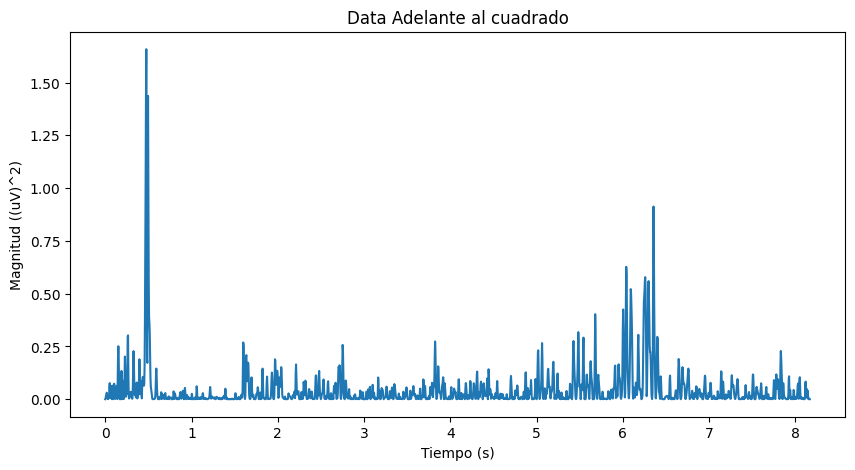

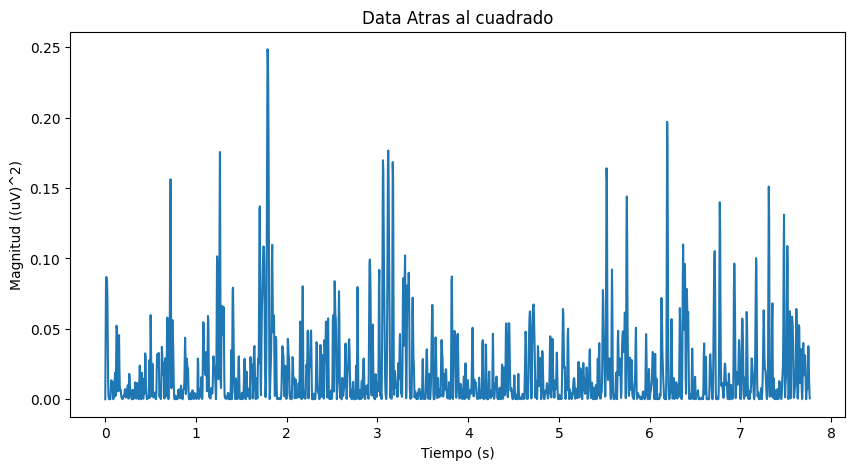

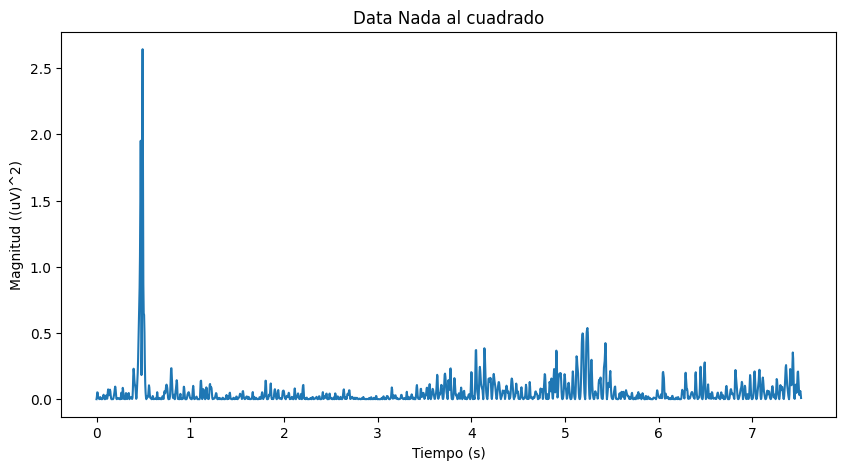

<h2 style="text-align: center;">Potencia total de las señales</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Adelante (uV^2/s)</th>
      <th>Atras (uV^2/s)</th>
      <th>Estado base (uV^2/s)</th>
    </tr>
    <tr>
      <th>N° de toma de dato</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>2094.826331</td>
      <td>183.236016</td>
      <td>111.182923</td>
    </tr>
    <tr>
      <th>2</th>
      <td>6.423027</td>
      <td>4.159851</td>
      <td>12.897123</td>
    </tr>
    <tr>
      <th>3</th>
      <td>10.080416</td>
      <td>8.702706</td>
      <td>9.764128</td>
    </tr>
    <tr>
      <th>4</th>
      <td>7.812238</td>
      <td>4.974850</td>
      <td>14.899256</td>
    </tr>
    <tr>
      <th>5</th>
      <td>11.649921</td>
      <td>27.875479</td>
      <td>16.522248</td>
    </tr>
    <tr>
      <th>6</th>
      <td>29.837624</td>
      <td>971.429221</td>
      <td>144.876387</td>
    </tr>
    <tr>
      <th>7</th>
      <td>9.325127</td>
      <td>11.259759</td>
      <td>13.769067</td>
    </tr>
    <tr>
      <th>8</th>
      <td>9.668798</td>
      <td>8.497371</td>
      <td>15.190665</td>
    </tr>
    <tr>
      <th>9</th>
      <td>8.992527</td>
      <td>20.192894</td>
      <td>18.231381</td>
    </tr>
    <tr>
      <th>10</th>
      <td>7.773269</td>
      <td>7.867452</td>
      <td>13.006725</td>
    </tr>
    <tr>
      <th>11</th>
      <td>538.120670</td>
      <td>1765.212717</td>
      <td>807.535139</td>
    </tr>
    <tr>
      <th>12</th>
      <td>11.855755</td>
      <td>15.268914</td>
      <td>12.613526</td>
    </tr>
    <tr>
      <th>13</th>
      <td>19.004682</td>
      <td>5.945916</td>
      <td>10.123953</td>
    </tr>
    <tr>
      <th>14</th>
      <td>9.097241</td>
      <td>7.070972</td>
      <td>15.017582</td>
    </tr>
    <tr>
      <th>15</th>
      <td>12.860007</td>
      <td>7.755803</td>
      <td>13.400564</td>
    </tr>
  </tbody>
</table>

<h2 style="text-align: center;">Potencia promedio según tipo de pensamiento</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Promedio de potencia (uV^2/s)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Adelante</th>
      <td>185.821842</td>
    </tr>
    <tr>
      <th>Atras</th>
      <td>203.296661</td>
    </tr>
    <tr>
      <th>Estado Base</th>
      <td>81.935378</td>
    </tr>
  </tbody>
</table>

In [39]:
# La parte gráfica es opcional aquí - no es necesaria
graficar_cuadratica(canal3_filtrado[0][toma1],nombre="Data Adelante al cuadrado")
graficar_cuadratica(canal3_filtrado[1][3],nombre="Data Atras al cuadrado")
graficar_cuadratica(canal3_filtrado[2][6],nombre="Data Nada al cuadrado")
data_frame = []
encabezado = ["Adelante (uV^2/s)","Atras (uV^2/s)","Estado base (uV^2/s)"]
for i in range(15):
    dato = []
    potencia1 = potencia(canal3_filtrado[0][i])
    potencia2 = potencia(canal3_filtrado[1][i])
    potencia3 = potencia(canal3_filtrado[2][i])
    dato.append(potencia1)
    dato.append(potencia2)
    dato.append(potencia3)
    data_frame.append(dato)
df_potencia_total = pd.DataFrame(data_frame,columns=encabezado)
df_potencia_total.index = pd.RangeIndex(start=1, stop=len(df_potencia_total) + 1, name="N° de toma de dato")

promedio_por_columna = df_potencia_total.mean(axis=0)

#Edición del Markdown

# Definir el título
titulo = 'Potencia total de las señales'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = df_potencia_total.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))


new = {0:'Promedio de potencia (uV^2/s)'}
promedios = pd.DataFrame(promedio_por_columna)
promedios = promedios.rename(columns=new)
promedios.index = ['Adelante','Atras','Estado Base']

titulo = 'Potencia promedio según tipo de pensamiento'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = promedios.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))

### Potencia de las ondas

In [40]:

data_frame = []
encabezado = ["Adelante (uV^2/s)","Atras (uV^2/s)","Estado base (uV^2/s)"]
for i in range(15):
    dato = []
    potencia1 = potencia(canal3_alfa[0][i])
    potencia2 = potencia(canal3_alfa[1][i])
    potencia3 = potencia(canal3_alfa[2][i])
    dato.append(potencia1)
    dato.append(potencia2)
    dato.append(potencia3)
    data_frame.append(dato)
df_potencia_alfa = pd.DataFrame(data_frame,columns=encabezado)
df_potencia_alfa.index = pd.RangeIndex(start=1, stop=len(df_potencia_alfa) + 1, name="N°")


data_frame = []
encabezado = ["Adelante (uV^2/s)","Atras (uV^2/s)","Estado base (uV^2/s)"]
for i in range(15):
    dato = []
    potencia1 = potencia(canal3_beta[0][i])
    potencia2 = potencia(canal3_beta[1][i])
    potencia3 = potencia(canal3_beta[2][i])
    dato.append(potencia1)
    dato.append(potencia2)
    dato.append(potencia3)
    data_frame.append(dato)
df_potencia_beta = pd.DataFrame(data_frame,columns=encabezado)
df_potencia_beta.index = pd.RangeIndex(start=1, stop=len(df_potencia_beta) + 1, name="N°")


# Edición del Markdown

promedio_por_columna = df_potencia_alfa.mean(axis=0)


# Definir el título
titulo = 'Potencia de la onda alfa en las señales'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = df_potencia_alfa.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))


new = {0:'Promedio de potencia de la onda alfa (uV^2/s)'}
promedios = pd.DataFrame(promedio_por_columna)
promedios = promedios.rename(columns=new)
promedios.index = ['Adelante','Atras','Estado Base']

titulo = 'Potencia promedio según tipo de pensamiento de la onda alfa'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = promedios.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))


promedio_por_columna = df_potencia_beta.mean(axis=0)



# Definir el título
titulo = 'Potencia de la onda beta en las señales'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = df_potencia_beta.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))


new = {0:'Promedio de potencia de la onda beta (uV^2/s)'}
promedios = pd.DataFrame(promedio_por_columna)
promedios = promedios.rename(columns=new)
promedios.index = ['Adelante','Atras','Estado Base']

titulo = 'Potencia promedio según tipo de pensamiento de la onda alfa'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = promedios.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))

<h2 style="text-align: center;">Potencia de la onda alfa en las señales</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Adelante (uV^2/s)</th>
      <th>Atras (uV^2/s)</th>
      <th>Estado base (uV^2/s)</th>
    </tr>
    <tr>
      <th>N°</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>1.704061e+62</td>
      <td>2.761359e+63</td>
      <td>3.970533e+61</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2.430256e+55</td>
      <td>9.611950e+50</td>
      <td>1.366822e+53</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.198973e+54</td>
      <td>5.264309e+56</td>
      <td>6.931684e+53</td>
    </tr>
    <tr>
      <th>4</th>
      <td>7.976415e+50</td>
      <td>6.633383e+53</td>
      <td>1.270171e+57</td>
    </tr>
    <tr>
      <th>5</th>
      <td>7.785778e+60</td>
      <td>2.371711e+65</td>
      <td>1.836347e+56</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1.593808e+77</td>
      <td>1.160998e+53</td>
      <td>1.928679e+62</td>
    </tr>
    <tr>
      <th>7</th>
      <td>3.244935e+33</td>
      <td>9.275168e+60</td>
      <td>7.447071e+51</td>
    </tr>
    <tr>
      <th>8</th>
      <td>3.062985e+53</td>
      <td>5.104326e+55</td>
      <td>1.626154e+64</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1.824846e+54</td>
      <td>7.091556e+56</td>
      <td>2.984060e+44</td>
    </tr>
    <tr>
      <th>10</th>
      <td>2.466111e+56</td>
      <td>6.071220e+55</td>
      <td>3.171914e+57</td>
    </tr>
    <tr>
      <th>11</th>
      <td>2.431018e+58</td>
      <td>1.057234e+68</td>
      <td>5.611792e+60</td>
    </tr>
    <tr>
      <th>12</th>
      <td>5.787199e+57</td>
      <td>3.358832e+49</td>
      <td>1.530055e+56</td>
    </tr>
    <tr>
      <th>13</th>
      <td>9.167814e+54</td>
      <td>7.494592e+55</td>
      <td>1.219552e+58</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1.939967e+53</td>
      <td>1.113275e+52</td>
      <td>2.042737e+52</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2.249277e+59</td>
      <td>1.210348e+57</td>
      <td>2.940249e+58</td>
    </tr>
  </tbody>
</table>

<h2 style="text-align: center;">Potencia promedio según tipo de pensamiento de la onda alfa</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Promedio de potencia de la onda alfa (uV^2/s)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Adelante</th>
      <td>1.062539e+76</td>
    </tr>
    <tr>
      <th>Atras</th>
      <td>7.064225e+66</td>
    </tr>
    <tr>
      <th>Estado Base</th>
      <td>1.099985e+63</td>
    </tr>
  </tbody>
</table>

<h2 style="text-align: center;">Potencia de la onda beta en las señales</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Adelante (uV^2/s)</th>
      <th>Atras (uV^2/s)</th>
      <th>Estado base (uV^2/s)</th>
    </tr>
    <tr>
      <th>N°</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>595.069738</td>
      <td>60.910971</td>
      <td>35.067014</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2.300241</td>
      <td>1.653335</td>
      <td>2.405292</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3.301225</td>
      <td>2.189750</td>
      <td>2.172438</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2.278828</td>
      <td>1.675069</td>
      <td>2.963219</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3.994348</td>
      <td>8.828174</td>
      <td>3.614153</td>
    </tr>
    <tr>
      <th>6</th>
      <td>9.330971</td>
      <td>307.797433</td>
      <td>47.240016</td>
    </tr>
    <tr>
      <th>7</th>
      <td>3.141762</td>
      <td>3.499645</td>
      <td>2.380286</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2.507674</td>
      <td>2.871879</td>
      <td>2.907883</td>
    </tr>
    <tr>
      <th>9</th>
      <td>2.728943</td>
      <td>6.902563</td>
      <td>3.788942</td>
    </tr>
    <tr>
      <th>10</th>
      <td>2.672340</td>
      <td>2.863732</td>
      <td>1.888484</td>
    </tr>
    <tr>
      <th>11</th>
      <td>168.813298</td>
      <td>572.994345</td>
      <td>256.019540</td>
    </tr>
    <tr>
      <th>12</th>
      <td>3.237404</td>
      <td>5.779760</td>
      <td>2.461138</td>
    </tr>
    <tr>
      <th>13</th>
      <td>6.276963</td>
      <td>2.003090</td>
      <td>1.799043</td>
    </tr>
    <tr>
      <th>14</th>
      <td>2.530863</td>
      <td>2.162297</td>
      <td>2.006437</td>
    </tr>
    <tr>
      <th>15</th>
      <td>3.245562</td>
      <td>3.080668</td>
      <td>1.733867</td>
    </tr>
  </tbody>
</table>

<h2 style="text-align: center;">Potencia promedio según tipo de pensamiento de la onda alfa</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Promedio de potencia de la onda beta (uV^2/s)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Adelante</th>
      <td>54.095344</td>
    </tr>
    <tr>
      <th>Atras</th>
      <td>65.680847</td>
    </tr>
    <tr>
      <th>Estado Base</th>
      <td>24.563183</td>
    </tr>
  </tbody>
</table>

## Power Spectral Density de las señales

### Power Spectral Density total - en todas las frecuencias (5 - 50 Hz)

In [41]:
data_frame = []
encabezado = ["Adelante (uV^2)","Atras (uV^2)","Estado base (uV^2)"]
for i in range(15):
    dato = []
    psd1 = psd(canal3_filtrado[0][i])
    psd2 = psd(canal3_filtrado[1][i])
    psd3 = psd(canal3_filtrado[2][i])
    dato.append(psd1)
    dato.append(psd2)
    dato.append(psd3)
    data_frame.append(dato)
df_psd_total = pd.DataFrame(data_frame,columns=encabezado)
df_psd_total.index = pd.RangeIndex(start=1, stop=len(df_psd_total) + 1, name="N° de toma de dato")



# Edición del Markdown

promedio_por_columna = df_psd_total.mean(axis=0)


# Definir el título
titulo = 'Power Spectral en el rango de frecuencias 5-50 Hz'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = df_psd_total.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))


new = {0:'Promedio del Power Spectral (uV^2)'}
promedios = pd.DataFrame(promedio_por_columna)
promedios = promedios.rename(columns=new)
promedios.index = ['Adelante','Atras','Estado Base']

titulo = 'Power Spectral Promedio 5-50 Hz'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = promedios.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))

<h2 style="text-align: center;">Power Spectral en el rango de frecuencias 5-50 Hz</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Adelante (uV^2)</th>
      <th>Atras (uV^2)</th>
      <th>Estado base (uV^2)</th>
    </tr>
    <tr>
      <th>N° de toma de dato</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.186347</td>
      <td>1.009103</td>
      <td>0.636505</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.025114</td>
      <td>0.017361</td>
      <td>0.054964</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.040039</td>
      <td>0.035182</td>
      <td>0.038534</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.032674</td>
      <td>0.019412</td>
      <td>0.068493</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.052851</td>
      <td>0.147955</td>
      <td>0.078135</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.157539</td>
      <td>5.547500</td>
      <td>0.780210</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.042974</td>
      <td>0.054637</td>
      <td>0.057629</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.041293</td>
      <td>0.041187</td>
      <td>0.069664</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0.040591</td>
      <td>0.106160</td>
      <td>0.084125</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0.032105</td>
      <td>0.031077</td>
      <td>0.051955</td>
    </tr>
    <tr>
      <th>11</th>
      <td>2.958676</td>
      <td>9.837704</td>
      <td>4.575379</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0.051829</td>
      <td>0.080113</td>
      <td>0.051549</td>
    </tr>
    <tr>
      <th>13</th>
      <td>0.086931</td>
      <td>0.025492</td>
      <td>0.039310</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0.038870</td>
      <td>0.030104</td>
      <td>0.067160</td>
    </tr>
    <tr>
      <th>15</th>
      <td>0.059709</td>
      <td>0.034802</td>
      <td>0.054014</td>
    </tr>
  </tbody>
</table>

<h2 style="text-align: center;">Power Spectral Promedio 5-50 Hz</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Promedio del Power Spectral (uV^2)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Adelante</th>
      <td>0.256503</td>
    </tr>
    <tr>
      <th>Atras</th>
      <td>1.134519</td>
    </tr>
    <tr>
      <th>Estado Base</th>
      <td>0.447175</td>
    </tr>
  </tbody>
</table>

### Power Spectral Density según ondas - Alfa (8 - 12 Hz)   Beta (12-30 Hz)

In [42]:

data_frame1 = []
data_frame2 = []
encabezado1 = ["Adelante (uV^2)","Atras (uV^2)","Estado base (uV^2)"]
encabezado2 = ["Adelante (uV^2)","Atras (uV^2)","Estado base (uV^2)"]
for i in range(15):
    dato1 = []
    dato2 = []
    psd1 = psd(canal3_filtrado[0][i],alfa=True,beta=True)
    psd2 = psd(canal3_filtrado[1][i],alfa=True,beta=True)
    psd3 = psd(canal3_filtrado[2][i],alfa=True,beta=True)
    dato1.append(psd1[0])
    dato1.append(psd2[0])
    dato1.append(psd3[0])
    dato2.append(psd1[1])
    dato2.append(psd2[1])
    dato2.append(psd3[1])
    data_frame1.append(dato1)
    data_frame2.append(dato2)
df_psd_alfa = pd.DataFrame(data_frame1,columns=encabezado1)
df_psd_alfa.index = pd.RangeIndex(start=1, stop=len(df_psd_alfa) + 1, name="N°")

df_psd_beta = pd.DataFrame(data_frame2,columns=encabezado2)
df_psd_beta.index = pd.RangeIndex(start=1, stop=len(df_psd_beta) + 1, name="N°")


# Edición del Markdown

promedio_por_columna = df_psd_alfa.mean(axis=0)


# Definir el título
titulo = 'Power Spectral en el rango de frecuencias de la onda alfa 8-12 Hz'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = df_psd_alfa.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))


new = {0:'Promedio del Power Spectral (uV^2)'}
promedios = pd.DataFrame(promedio_por_columna)
promedios = promedios.rename(columns=new)
promedios.index = ['Adelante','Atras','Estado Base']

titulo = 'Power Spectral Promedio en la onda alfa'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = promedios.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))


promedio_por_columna = df_psd_beta.mean(axis=0)


# Definir el título
titulo = 'Power Spectral en el rango de frecuencias de la onda beta 12-30 Hz'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = df_psd_beta.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))


new = {0:'Promedio del Power Spectral (uV^2)'}
promedios = pd.DataFrame(promedio_por_columna)
promedios = promedios.rename(columns=new)
promedios.index = ['Adelante','Atras','Estado Base']

titulo = 'Power Spectral Promedio en la onda beta'

# Crear el título centrado en formato Markdown
titulo_markdown = f'<h2 style="text-align: center;">{titulo}</h2>'

# Mostrar el título centrado
display(Markdown(titulo_markdown))

# Convertir el DataFrame a formato HTML
tabla_html = promedios.to_html()

# Agregar estilos CSS para centrar la tabla
tabla_html_centro = tabla_html.replace('<table', '<table style="margin-left:auto;margin-right:auto;"')

# Mostrar la tabla en Markdown
display(Markdown(tabla_html_centro))

<h2 style="text-align: center;">Power Spectral en el rango de frecuencias de la onda alfa 8-12 Hz</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Adelante (uV^2)</th>
      <th>Atras (uV^2)</th>
      <th>Estado base (uV^2)</th>
    </tr>
    <tr>
      <th>N°</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.022901</td>
      <td>0.169138</td>
      <td>0.126029</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.007748</td>
      <td>0.004263</td>
      <td>0.029280</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.014712</td>
      <td>0.012917</td>
      <td>0.018807</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.009200</td>
      <td>0.005723</td>
      <td>0.038334</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.015445</td>
      <td>0.030894</td>
      <td>0.032903</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.029723</td>
      <td>1.012926</td>
      <td>0.138058</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.012613</td>
      <td>0.012596</td>
      <td>0.030314</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.016214</td>
      <td>0.010018</td>
      <td>0.032666</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0.010762</td>
      <td>0.019718</td>
      <td>0.036957</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0.012532</td>
      <td>0.010548</td>
      <td>0.030103</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0.549020</td>
      <td>1.735881</td>
      <td>0.849012</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0.016946</td>
      <td>0.013916</td>
      <td>0.025883</td>
    </tr>
    <tr>
      <th>13</th>
      <td>0.023740</td>
      <td>0.008753</td>
      <td>0.021258</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0.016690</td>
      <td>0.011403</td>
      <td>0.042646</td>
    </tr>
    <tr>
      <th>15</th>
      <td>0.021582</td>
      <td>0.008597</td>
      <td>0.035243</td>
    </tr>
  </tbody>
</table>

<h2 style="text-align: center;">Power Spectral Promedio en la onda alfa</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Promedio del Power Spectral (uV^2)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Adelante</th>
      <td>0.051988</td>
    </tr>
    <tr>
      <th>Atras</th>
      <td>0.204486</td>
    </tr>
    <tr>
      <th>Estado Base</th>
      <td>0.099166</td>
    </tr>
  </tbody>
</table>

<h2 style="text-align: center;">Power Spectral en el rango de frecuencias de la onda beta 12-30 Hz</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Adelante (uV^2)</th>
      <th>Atras (uV^2)</th>
      <th>Estado base (uV^2)</th>
    </tr>
    <tr>
      <th>N°</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.023265</td>
      <td>0.301232</td>
      <td>0.177323</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.007026</td>
      <td>0.005253</td>
      <td>0.008173</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.010576</td>
      <td>0.007228</td>
      <td>0.006905</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.008005</td>
      <td>0.005124</td>
      <td>0.011752</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.015328</td>
      <td>0.042128</td>
      <td>0.016130</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.044354</td>
      <td>1.576945</td>
      <td>0.226608</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.010100</td>
      <td>0.013886</td>
      <td>0.009148</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.009049</td>
      <td>0.012401</td>
      <td>0.012011</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0.010919</td>
      <td>0.031818</td>
      <td>0.015612</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0.008302</td>
      <td>0.007391</td>
      <td>0.006278</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0.833498</td>
      <td>2.872082</td>
      <td>1.299955</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0.010824</td>
      <td>0.028121</td>
      <td>0.008206</td>
    </tr>
    <tr>
      <th>13</th>
      <td>0.024842</td>
      <td>0.006732</td>
      <td>0.005675</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0.006928</td>
      <td>0.007063</td>
      <td>0.006407</td>
    </tr>
    <tr>
      <th>15</th>
      <td>0.011200</td>
      <td>0.011072</td>
      <td>0.006204</td>
    </tr>
  </tbody>
</table>

<h2 style="text-align: center;">Power Spectral Promedio en la onda beta</h2>

<table style="margin-left:auto;margin-right:auto;" border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Promedio del Power Spectral (uV^2)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Adelante</th>
      <td>0.068948</td>
    </tr>
    <tr>
      <th>Atras</th>
      <td>0.328565</td>
    </tr>
    <tr>
      <th>Estado Base</th>
      <td>0.121092</td>
    </tr>
  </tbody>
</table>

## Espectograma de la Transformada de Wavelet Morlet

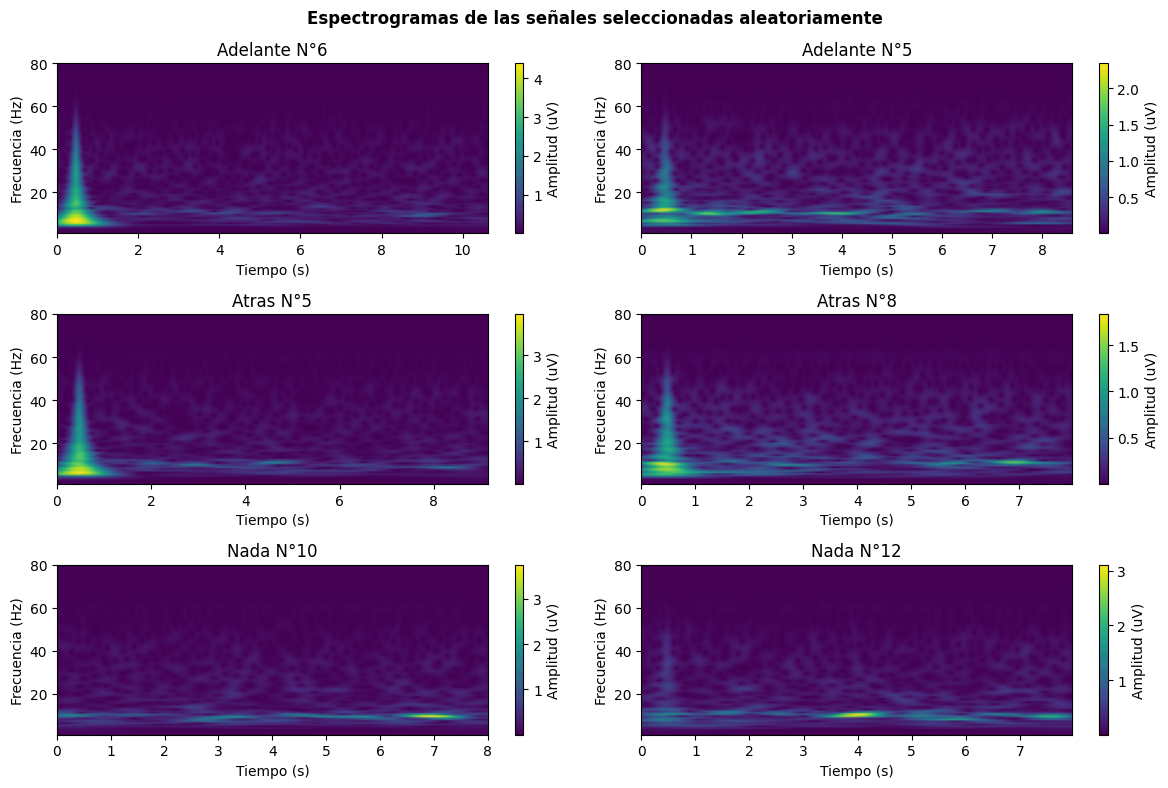

In [43]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
spectogram_morlet(canal3_filtrado[0][5],"Adelante N°6",axs[0,0])
spectogram_morlet(canal3_filtrado[0][4],"Adelante N°5",axs[0,1])

spectogram_morlet(canal3_filtrado[1][4],"Atras N°5",axs[1,0])
spectogram_morlet(canal3_filtrado[1][7],"Atras N°8",axs[1,1])

spectogram_morlet(canal3_filtrado[2][9],"Nada N°10",axs[2,0])
spectogram_morlet(canal3_filtrado[2][11],"Nada N°12",axs[2,1])

fig.suptitle('Espectrogramas de las señales seleccionadas aleatoriamente', fontsize=12, fontweight='bold')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

# Generación de los dataset para Inteligencia Artificial

| Descripción | Categoria |
|----------|----------|
| Adelante    | 0   |
| Atrás   | 1   | 
| Estado basal    | 2   |

In [44]:
lista_arrays_limitada = [np.resize(arr, 2000) for arr in canal3_filtrado[0]]
lst_adelante = np.stack(lista_arrays_limitada)
lista_arrays_limitada = [np.resize(arr, 2000) for arr in canal3_filtrado[1]]
lst_atras = np.stack(lista_arrays_limitada)
lista_arrays_limitada = [np.resize(arr, 2000) for arr in canal3_filtrado[2]]
lst_nada = np.stack(lista_arrays_limitada)

tamano1 = lst_adelante.shape
tamano2 = lst_adelante.shape
tamano3 = lst_adelante.shape

t1 = tamano1[0]*tamano1[1]
t2 = tamano2[0]*tamano2[1]
t3 = tamano3[0]*tamano3[1]

target = np.full(t1,0.0)
target = np.concatenate((target,np.full(t2,1.0)))
target = np.concatenate((target,np.full(t3,2.0)))

eeg = np.concatenate((lst_adelante, lst_atras), axis=0)
eeg = np.concatenate((eeg, lst_nada), axis=0)

#DataSet canal 3
dataset_canal3 = {
    'eeg': eeg,
    'target': target
}


lista_arrays_limitada = [np.resize(arr, 2000) for arr in canal4_filtrado[0]]
lst_adelante = np.stack(lista_arrays_limitada)
lista_arrays_limitada = [np.resize(arr, 2000) for arr in canal4_filtrado[1]]
lst_atras = np.stack(lista_arrays_limitada)
lista_arrays_limitada = [np.resize(arr, 2000) for arr in canal4_filtrado[2]]
lst_nada = np.stack(lista_arrays_limitada)

tamano1 = lst_adelante.shape
tamano2 = lst_adelante.shape
tamano3 = lst_adelante.shape

t1 = tamano1[0]*tamano1[1]
t2 = tamano2[0]*tamano2[1]
t3 = tamano3[0]*tamano3[1]

target = np.full(t1,0.0)
target = np.concatenate((target,np.full(t2,1.0)))
target = np.concatenate((target,np.full(t3,2.0)))

eeg = np.concatenate((lst_adelante, lst_atras), axis=0)
eeg = np.concatenate((eeg, lst_nada), axis=0)

#DataSet canal 4
dataset_canal4 = {
    'eeg': eeg,
    'target': target
}


nombre_archivo = "DataSet_Canal3.csv"

with open(nombre_archivo, "w", newline="") as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)

    # Escribe los encabezados (opcional)
    escritor_csv.writerow(dataset_canal3.keys())

    # Escribe los valores del diccionario
    escritor_csv.writerow(dataset_canal3.values())

nombre_archivo = "DataSet_Canal4.csv"

with open(nombre_archivo, "w", newline="") as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)

    # Escribe los encabezados (opcional)
    escritor_csv.writerow(dataset_canal4.keys())

    # Escribe los valores del diccionario
    escritor_csv.writerow(dataset_canal4.values())